<a href="https://colab.research.google.com/github/ujjwal28-max/LINEAR-REGRESSION/blob/main/end2end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
# preprocess + EDA + Feature selection (null values find , indentify outliers )
# extract input and output cols
# scale    the values (distance ke liya)
# train    the split
# train    the model
# evaluate the model
# deploy   the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
import matplotlib.pyplot as plt

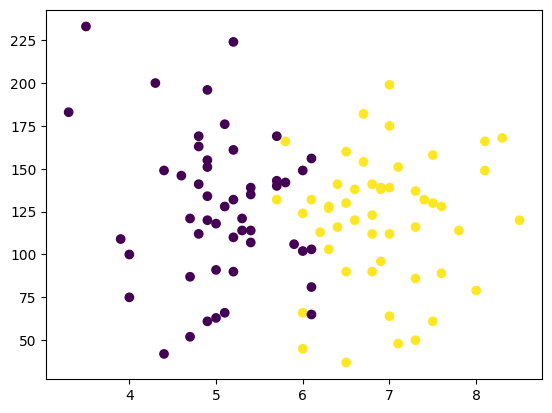

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
x_test

,Unnamed: 0,cgpa
70,70,6.3
47,47,5.2
55,55,7.8
31,31,3.9
97,97,6.7
65,65,8.1
42,42,7.6
34,34,4.8
44,44,7.5
54,54,6.4


In [ ]:
x_train

,Unnamed: 0,cgpa
38,38,6.5
29,29,7.0
26,26,7.0
63,63,6.3
62,62,6.0
...,...,...
5,5,7.1
91,91,7.5
81,81,5.4
3,3,7.4


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train


array([[-3.70108921e-01,  5.05680590e-01],
       [-6.72619744e-01,  9.58979924e-01],
       [-7.73456685e-01,  9.58979924e-01],
       [ 4.70198922e-01,  3.24360857e-01],
       [ 4.36586608e-01,  5.23812564e-02],
       [-3.02884293e-01, -9.44877278e-01],
       [ 1.20966982e+00, -1.28938477e-01],
       [-9.75130567e-01,  5.96340457e-01],
       [-4.03721235e-01,  1.95623846e+00],
       [-1.61376453e+00, -3.82786104e-02],
       [-1.64737684e+00,  7.77660191e-01],
       [ 8.06322059e-01, -9.44877278e-01],
       [ 1.51218065e+00, -1.12619701e+00],
       [-1.58015221e+00, -5.82237811e-01],
       [ 4.02974294e-01,  1.23095952e+00],
       [ 3.69361981e-01,  8.68320057e-01],
       [-9.41518254e-01,  1.04963979e+00],
       [ 1.10883288e+00,  5.05680590e-01],
       [ 1.24328214e+00, -7.63557545e-01],
       [ 1.68024221e+00,  2.33700990e-01],
       [-7.06232058e-01, -6.72897678e-01],
       [-1.01210411e-01, -5.82237811e-01],
       [ 1.27689445e+00, -2.19598344e-01],
       [-1.

In [ ]:
x_test

array([[ 0.70548512,  0.32436086],
       [-0.0675981 , -0.67289768],
       [ 0.20130041,  1.68425886],
       [-0.60539512, -1.85147595],
       [ 1.61301759,  0.68700032],
       [ 0.53742355,  1.95623846],
       [-0.23565967,  1.50293912],
       [-0.50455818, -1.03553714],
       [-0.16843504,  1.41227926],
       [ 0.1676881 ,  0.41502072]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred=(y_pred >= 0.5).astype(int)

In [ ]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test

,placement
70,1
47,0
55,1
31,0
97,1
65,1
42,1
34,0
44,1
54,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

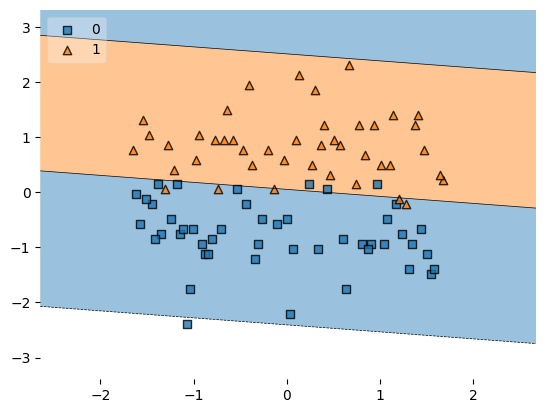

In [ ]:
fig = plot_decision_regions(X=x_train, y=y_train.values,
                                clf=lr, legend=2)

In [ ]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))
